In [2]:
import numpy as np
import math 
import random
import copy
from matplotlib import pyplot as plt

C:\Users\Tommy\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log
C:\Users\Tommy\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Tommy\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Tommy\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in double_scalars


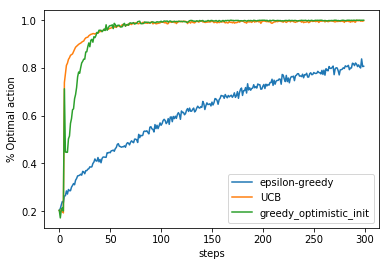

In [9]:
### ===================       2.1 UCB versus epsilon-greedy     =================== ###### 
    
exploration_approaches = ['epsilon-greedy', 'UCB', 'greedy_optimistic_init'] #  
timesteps = 300
iterations = 1000
k = 5 # Nr of bandits (or actions). Could do more
actions = list(range(0, k))
chosen_actions = []
means = [1,2,3,4,5] # mean reward for each arm
sd = 1 # standard deviation

epsilon = 0.1
c = 2 # For UCB. Could tune this  


def greedy_selection(Q, epsilon): # function now handles optimistic greedy for epsilon = 0
    all_possible_actions = copy.copy(actions)
    greedy_action = shuffle_argmax(Q)
    all_possible_actions.remove(greedy_action)
    exploratory_action = random.choices(all_possible_actions)[0] # need to index else we get []s
    chosen_action = exploratory_action if random.uniform(0,1) < epsilon else greedy_action
    return chosen_action

def shuffle_argmax(Q):
    ind = list(range(0,len(Q)))
    random.shuffle(ind)
    Q_shuf = [Q[i] for i in ind]
    best = np.argmax(Q_shuf)
    return ind[best]
    
def pick_best_accordingto_UCB(Q):
    Q_UCB = [0] * len(Q) # initializing
    for action, action_value in enumerate(Q):              # should be a loop-less way, but this works for now
        UCB = c * np.sqrt(np.log(t)/(2*selection_history[action]))
        Q_UCB[action] = action_value + UCB
    return shuffle_argmax(Q_UCB)         
    
def select_action(Q, exploration_approach):  
    if exploration_approach == 'epsilon-greedy':
        chosen_action = greedy_selection(Q, 0.1)
    elif exploration_approach == 'UCB':
        chosen_action = pick_best_accordingto_UCB(Q)
    elif exploration_approach == 'greedy_optimistic_init':
        chosen_action = greedy_selection(Q, 0)
    return chosen_action
            
    
############              MAIN               ##############
    
for nth_strategy, strategy in enumerate(exploration_approaches):
 
    average_rewards = [0] * timesteps # initialize a list that will keep track of (incrementally updated) average reward at each t over all iterations
    
    opt_action_count = [0] * timesteps
    for i in list(range(iterations)):
        
        Q = [0] * k if strategy != 'greedy_optimistic_init' else [10] * k    # Initializing action values
        selection_history = [0] * k   # initialize an array that will record how often actions have been selected
 
        for t in list(range(timesteps)): 
            a = select_action(Q, strategy) # which lever will we pull under the given strategy
            reward = np.random.normal(means[a], sd)     
            
            average_rewards[t] += (reward - average_rewards[t]) / (i+1) # i+1, otherwise we'd divide by 0 in the 0-th iteration    
            
            selection_history[a] += 1
            Q[a] = Q[a] + (1/(selection_history[a]+1)) * (reward - Q[a])
            if a == 4:
                opt_action_count[t] += 1
        
#     plt.plot(list(range(len(average_rewards))), average_rewards, label=strategy)
    plt.plot(list(range(len(opt_action_count))),[count / iterations for count in opt_action_count], label=strategy)

plt.xlabel('steps')
# plt.ylabel('average reward')
plt.ylabel('% Optimal action')
plt.legend()
# plt.savefig('assignment1_2-1_avg_reward.eps')
plt.savefig('assignment1_2-1_opt_action_rate.eps')
plt.show()
